Dataset link:https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

Importing Libraries


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Test set Image Processing

In [63]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

Loading Model

In [64]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

Visualising and Performing Prediction on Single image

In [65]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


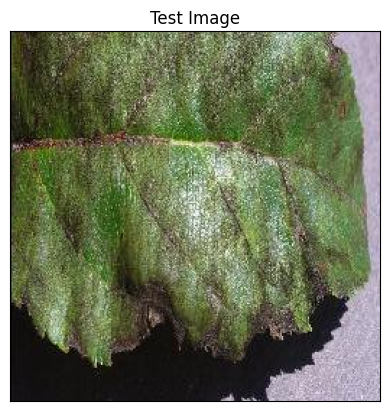

In [70]:
#Test Image Visualization
import cv2
image_path = 'test/test/AppleScab3.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

Testing Model

In [71]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


In [73]:
print(predictions)

[[5.5971090e-05 3.3445744e-05 1.4274561e-06 9.1828394e-04 9.6335029e-08
  3.0357214e-05 3.1801783e-06 3.7659763e-03 3.0535538e-04 2.1433976e-05
  8.2396191e-06 1.5846743e-07 2.6415026e-05 6.1912974e-04 3.5874214e-07
  2.5979289e-06 4.2584903e-05 6.7363777e-07 2.9505113e-06 1.3409912e-06
  9.9119639e-01 2.8162435e-04 9.8751148e-04 1.7387874e-06 1.8642783e-06
  4.7471275e-04 4.0429775e-04 2.6025311e-06 6.6645121e-08 2.0949113e-04
  5.5308640e-04 3.7617369e-07 6.2281492e-06 5.0011806e-08 5.6420331e-06
  1.1601577e-07 5.6060032e-09 3.4294932e-05]]


In [74]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

20


Diseased Area 


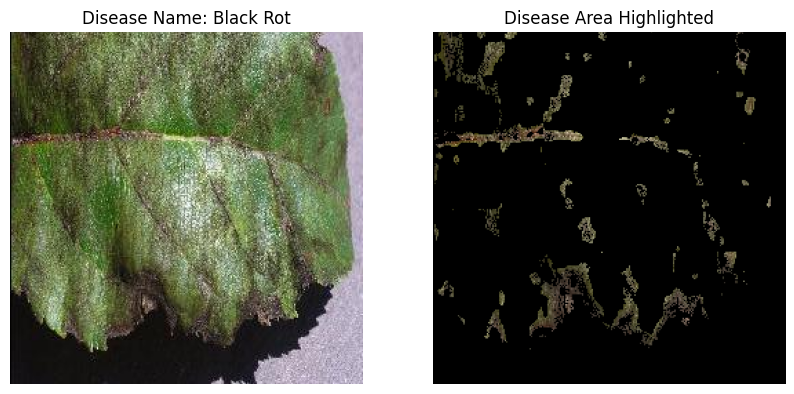

In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Load and Prepare Image ---
image_path = 'test/test/AppleScab3.JPG'  # Update this path

# Check if image exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image not found at: {image_path}")

img = cv2.imread(image_path)
if img is None:
    raise ValueError("cv2.imread() failed to load the image.")

# Convert to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# --- Preprocess Image for Model ---
# Resize and normalize according to your model's needs
img_resized = cv2.resize(img, (224, 224))  # Example size
img_array = img_resized / 255.0            # Normalize
input_array = np.expand_dims(img_array, axis=0)  # shape (1, 224, 224, 3)

# --- Fake Model Prediction ---
# Replace with actual model prediction
predictions = np.array([[0.1, 0.7, 0.2]])  # Fake prediction
class_name = ['Apple Scab', 'Black Rot', 'Cedar Apple Rust']

# Get predicted index and class name
result_index = int(np.argmax(predictions))
model_prediction = class_name[result_index]

# --- Highlight Diseased Area ---
# Convert image to HSV for color-based segmentation (for disease highlight)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define color range for diseased area (adjust the range to suit your image)
lower_rust = np.array([10, 50, 50])  # Lower HSV values (e.g., yellow/brown)
upper_rust = np.array([30, 255, 255])  # Upper HSV values

# Create a mask for the diseased area
mask = cv2.inRange(hsv, lower_rust, upper_rust)

# Highlight diseased area (bitwise AND with the mask)
highlighted = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

# --- Display the Result ---
plt.figure(figsize=(10, 10))

# Display the original image with the disease name title
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title(f"Disease Name: {model_prediction}")
plt.axis('off')

# Display the image with the highlighted diseased area
plt.subplot(1, 2, 2)
plt.imshow(highlighted)
plt.title(f"Disease Area Highlighted")
plt.axis('off')

plt.show()
